In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

# Converting text file into dataframe

In [62]:
path = r'C:\Users\Pooja\Downloads\implementation_of_RCNN-master\DATA\agri_data\data'
print(len(path))

74


In [63]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [64]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [65]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

In [66]:
%pip install opencv-python

In [67]:
print(len(images))


1300


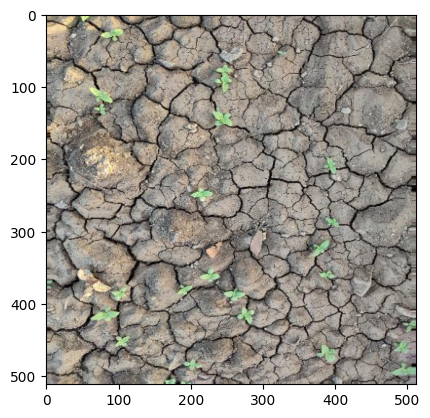

In [68]:
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[6]),cv2.COLOR_BGR2RGB))

In [69]:
%pip install opencv-python

In [70]:
image_name = r'"C:\Users\Pooja\Downloads\implementation_of_RCNN-master\DATA\agri_data\data"'
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[78:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

100%|██████████| 1300/1300 [00:01<00:00, 904.88it/s]


In [71]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,i_0_1009.jpeg,1,0.608398,0.498047,0.541016,0.53125
1,i_0_1017.jpeg,1,0.496094,0.384766,0.960938,0.753906
2,i_0_1018.jpeg,1,0.445312,0.483398,0.808594,0.634766
3,i_0_1020.jpeg,1,0.494141,0.350586,0.730469,0.611328
4,i_0_1024.jpeg,1,0.601562,0.448242,0.570312,0.595703


# Converting dataframe into Pascal-voc format

In [72]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [73]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    

100%|██████████| 2072/2072 [00:01<00:00, 1564.29it/s]


In [74]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,i_0_1009.jpeg,512,512,weed,172,119,449,391
1,i_0_1017.jpeg,512,512,weed,8,4,500,390
2,i_0_1018.jpeg,512,512,weed,20,84,434,409
3,i_0_1020.jpeg,512,512,weed,66,23,440,336
4,i_0_1024.jpeg,512,512,weed,161,76,453,381
...,...,...,...,...,...,...,...,...
2067,i_0_9963.jpeg,512,512,weed,58,80,455,336
2068,i_0_9971.jpeg,512,512,weed,45,132,228,311
2069,i_0_9971.jpeg,512,512,weed,52,355,227,512
2070,i_0_9971.jpeg,512,512,weed,272,80,458,310


# Visualizing labels

Trying to load image from: C:\Users\Pooja\Downloads\implementation_of_RCNN-master\DATA\agri_data\data\i_0_1028.jpeg
Image file not found: C:\Users\Pooja\Downloads\implementation_of_RCNN-master\DATA\agri_data\data\i_0_1028.jpeg
Skipping index 0 due to NaN values in bounding box coordinates.
Skipping index 1 due to NaN values in bounding box coordinates.
Skipping index 2 due to NaN values in bounding box coordinates.
Skipping index 3 due to NaN values in bounding box coordinates.
Skipping index 4 due to NaN values in bounding box coordinates.
Skipping index 5 due to NaN values in bounding box coordinates.
Skipping index 6 due to NaN values in bounding box coordinates.
Skipping index 7 due to NaN values in bounding box coordinates.
Skipping index 8 due to NaN values in bounding box coordinates.
Skipping index 9 due to NaN values in bounding box coordinates.
Skipping index 10 due to NaN values in bounding box coordinates.
Skipping index 11 due to NaN values in bounding box coordinates.


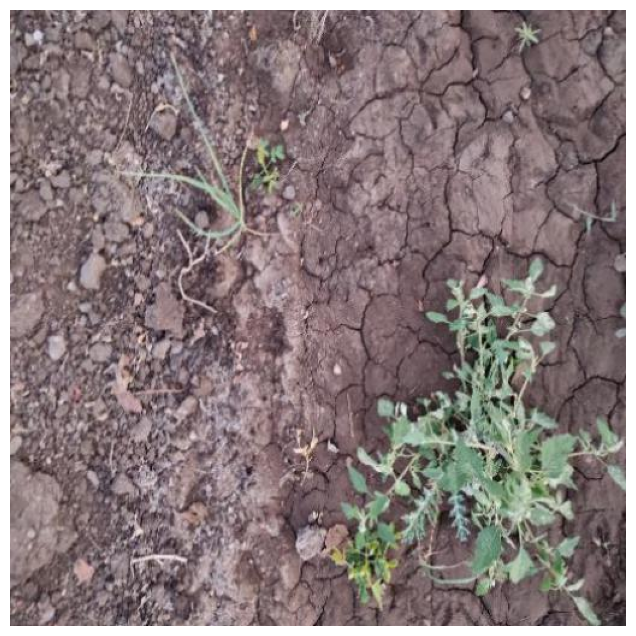

In [86]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Assuming 'pascal_voc' DataFrame and 'path' are defined
any_index_number = 8  # Change this number for different images

# Get the full image path
full_image_path = os.path.join(path, pascal_voc.loc[any_index_number, 'filename'].strip())
print(f"Trying to load image from: {full_image_path}")  # Debug print

# Check if the image file exists
if os.path.exists(full_image_path):
    test_img = cv2.cvtColor(cv2.imread(full_image_path), cv2.COLOR_BGR2RGB)

    # Proceed with your further processing...
else:
    print(f"Image file not found: {full_image_path}")

# Continue with your processing if the image is found
if 'test_img' in locals():  # Check if test_img was defined
    test_df = pascal_voc[pascal_voc['filename'] == pascal_voc.loc[any_index_number, 'filename']].reset_index(drop=True)

    for i in range(len(test_df)):
        if pd.isna(test_df.loc[i, 'xmin']) or pd.isna(test_df.loc[i, 'ymin']) or \
           pd.isna(test_df.loc[i, 'xmax']) or pd.isna(test_df.loc[i, 'ymax']):
            print(f"Skipping index {i} due to NaN values in bounding box coordinates.")
            continue

        xmin = int(test_df.loc[i, 'xmin'])
        ymin = int(test_df.loc[i, 'ymin'])
        xmax = int(test_df.loc[i, 'xmax'])
        ymax = int(test_df.loc[i, 'ymax'])

        # Draw the rectangle
        cv2.rectangle(test_img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

        # Put the class label (assuming 'class' contains 'weed' or 'crop')
        class_label = test_df.loc[i, 'class']
        test_img = cv2.putText(test_img, class_label, (xmin, ymin - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)

    # Display the resulting image
    plt.figure(figsize=(8, 8))
    plt.imshow(test_img)
    plt.axis('off')
    plt.show()


In [84]:
print(pascal_voc.head())  # Print the first few rows of the DataFrame
print(pascal_voc.isna().sum())  # Count NaN values in each column


        filename xmin ymin xmax ymax class
0  i_0_1009.jpeg  NaN  NaN  NaN  NaN   NaN
1  i_0_1017.jpeg  NaN  NaN  NaN  NaN   NaN
2  i_0_1018.jpeg  NaN  NaN  NaN  NaN   NaN
3  i_0_1020.jpeg  NaN  NaN  NaN  NaN   NaN
4  i_0_1024.jpeg  NaN  NaN  NaN  NaN   NaN
filename       0
xmin        2072
ymin        2072
xmax        2072
ymax        2072
class       2072
dtype: int64


# Saving label file

In [85]:

pascal_voc.to_csv('pascal_voc_format.csv',index=False)